In [65]:
import pandas as pd

yield_rates1 = pd.read_csv('data/bond-yield/yield-curve-rates-1990-2021.csv')
yield_rates2 = pd.read_csv('data/bond-yield/yield-curve-rates-2022.csv')
yield_rates3 = pd.read_csv('data/bond-yield/yield-curve-rates-2023.csv')

frames = [yield_rates3, yield_rates2, yield_rates1]
yield_rates = pd.concat(frames, ignore_index=True)
# yield_rates

stock_symbol = 'RY.TO'
bank_data = pd.read_csv('data/banks/{}_delta_extremes.csv'.format(stock_symbol), index_col=0)
# bank_data.head()

spread_10_2 = []
spread_10_3 = []

for i in range(len(yield_rates)):
    spread_10_2.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['2 Yr'])
    spread_10_3.append(yield_rates.loc[i]['10 Yr'] - yield_rates.loc[i]['3 Mo'])

yield_spread = yield_rates.copy()
yield_spread['spread_10_2'] = spread_10_2
yield_spread['spread_10_3'] = spread_10_3
# yield_spread.head()

yield_dates = pd.to_datetime(yield_spread['Date'])

new_yield = pd.DataFrame({
    'Date' : yield_dates, 
    'spread_10_2': yield_spread['spread_10_2'], 
    'spread_10_3': yield_spread['spread_10_3']
    })
# new_yield.head()

bank_dates = pd.to_datetime(bank_data['Date'])

new_bank = pd.DataFrame({
    'Date': bank_dates,
    'Adj Close': bank_data['Adj Close'],
    'Delta': bank_data['Delta'],
    'Extremes' : bank_data['Extremes']
})
# new_bank.head()

bank_yield = pd.merge(new_yield, new_bank, how='inner')
# bank_yield.head()

bank_yield_copy = bank_yield.copy()
# print(len(bank_yield))
bank_yield_final = bank_yield_copy.dropna().iloc[::-1]
# print(len(bank_yield_final))
# bank_yield_final.head()
df = bank_yield_final.set_index(bank_yield_final['Date'])
df

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
Date,,,,,,
1995-01-13,1995-01-13,0.30,1.97,2.414120,0.952308,Non-Extreme
1995-01-17,1995-01-17,0.26,1.81,2.425963,-1.370387,Non-Extreme
1995-01-18,1995-01-18,0.23,1.84,2.448739,0.938844,Non-Extreme
1995-01-19,1995-01-19,0.25,1.87,2.463472,0.601657,Non-Extreme
1995-01-20,1995-01-20,0.32,1.91,2.440450,-0.934535,Non-Extreme
...,...,...,...,...,...,...
2023-10-18,2023-10-18,-0.28,-0.70,113.650002,-1.627280,Non-Extreme
2023-10-19,2023-10-19,-0.16,-0.62,113.029999,-0.545537,Non-Extreme
2023-10-20,2023-10-20,-0.14,-0.65,111.010002,-1.787134,Non-Extreme


In [66]:
dividend_frame = pd.read_csv('data/banks/RY.TO_dividend_extremes.csv', index_col=0)

dividend_yields = []

for i in range(0, len(dividend_frame)):
    div_yield = 400 * (dividend_frame.loc[i]['Dividends'] / dividend_frame.loc[i]['Adj Close'])
    dividend_yields.append(div_yield)

dividend_frame['Dividend Yield'] = dividend_yields
dividend_frame['Month'] = pd.DatetimeIndex(dividend_frame['Date']).month
# dividend_frame
yearly_yield = dividend_frame.loc[dividend_frame['Month'] == 10].reset_index(drop=True)
# print()
dividend_range = df['1995-01-19':'2023-7-24']
# dividend_range

In [67]:
from datetime import datetime

yield_list = []

for i in range(len(yearly_yield) - 1):

    div_yield = yearly_yield.loc[i]['Dividend Yield']

    start_point = yearly_yield.loc[i]['Date']
    end_point = yearly_yield.loc[i+1]['Date']
    date_obj = datetime.strptime(end_point, '%Y-%m-%d').date()
    date_str = '{y}-{m}-{d}'.format(y=date_obj.year, m=date_obj.month, d=date_obj.day - 1)
    quarter_len = len(dividend_range[start_point: date_str])

    for j in range(quarter_len):
        yield_list.append(div_yield)

# print(len(yield_list))
spread_yield_3 = df['1995-10-23':'2022-10-24'].copy()
spread_yield_3['Dividend Yield'] = yield_list
spread_yield_3

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
Date,,,,,,,
1995-10-23,1995-10-23,0.31,0.69,2.727312,-4.769766,Negative Extreme,11.366503
1995-10-24,1995-10-24,0.34,0.64,2.751025,0.869464,Non-Extreme,11.366503
1995-10-25,1995-10-25,0.36,0.61,2.703596,-1.724048,Non-Extreme,11.366503
1995-10-26,1995-10-26,0.45,0.68,2.739644,1.333335,Non-Extreme,11.366503
1995-10-27,1995-10-27,0.41,0.64,2.787073,1.731210,Non-Extreme,11.366503
...,...,...,...,...,...,...,...
2022-10-18,2022-10-18,-0.42,-0.03,119.302925,0.501696,Non-Extreme,3.490205
2022-10-19,2022-10-19,-0.41,0.07,118.419205,-0.740736,Non-Extreme,3.490205
2022-10-20,2022-10-20,-0.38,0.15,116.930313,-1.257306,Non-Extreme,3.490205


In [68]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import t


# df = ry_copy.copy()
# column_2 = 'Dividend Yield' , 'Price/Book'

# training a model to some test dataframe (defined over a time period):
def SLR(df):
    X = df['spread_10_3']
    X_2 = np.array(X).reshape(-1,1)
    y = df['Adj Close']

    regr = linear_model.LinearRegression()
    regr.fit(X_2, y)
    fitted_values = regr.predict(X_2)
    df['Fitted Values'] = fitted_values
    actuals = df['Adj Close']

    plt.scatter(df['spread_10_3'], df['Adj Close'], s=5)
    plt.plot(df['spread_10_3'], df['Fitted Values'], color='red')
    plt.show()

    print('R-Squared: {}'.format(regr.score(X_2,y)))


    print('b0: {}'.format(regr.intercept_))
    print('b1: {}'.format(regr.coef_[0]))
    # print(regr.feature_names_in_)

    residuals = []

    for (i,j) in zip(actuals, fitted_values):
        residuals.append(i - j)

    n = len(df)
    std_error = np.std(residuals)
    critical_value = t.ppf(q = 1 - 0.025, df = n - 2)
    band_width = critical_value * std_error

    return [regr, band_width]




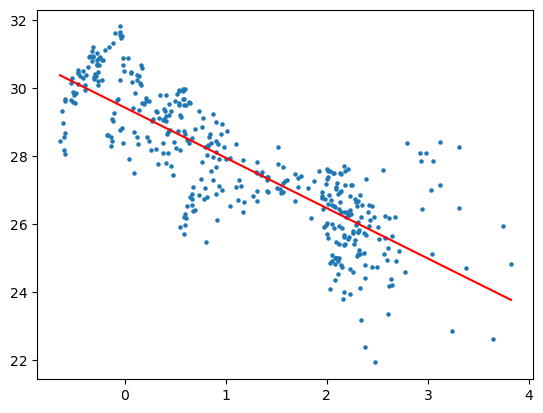

R-Squared: 0.6672539717077529
b0: 29.433550611648435
b1: -1.4840477896603597


In [69]:
dum_gfc = spread_yield_3['2007-02-27':'2008-10-15'].copy()
gfc_dum = SLR(dum_gfc)[0]
dum_gfc.to_csv('gfc_2.csv')

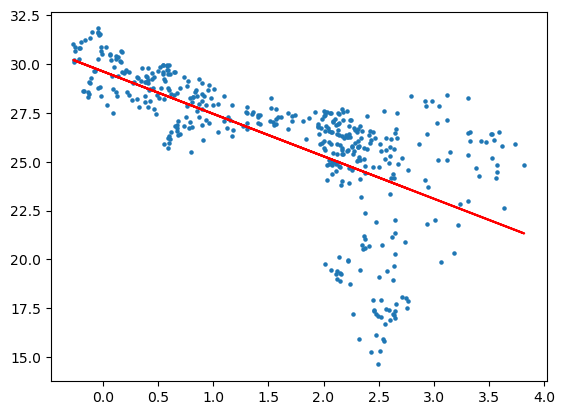

R-Squared: 0.4238180081000287
b0: 29.621153896952535
b1: -2.169850932485912


In [70]:
gfc = spread_yield_3['2007-05-01':'2009-02-27'].copy()
# np.array(gfc['spread_10_3']).reshape(-1,1).shape
gfc_model = SLR(gfc)[0]
gfc.to_csv('gfc_follows_yield.csv')

In [71]:
len(gfc_model.coef_)

#   function that inputs a test set and a model, and makes predictions 
# for the test set, including upper and lower bounds, graphs predictions, 
# and returns an expanded dataframe


# training period = '2007-05-01':'2009-02-27'
# test peroid = '2023-05-04':'2023-10-24'
# models: gfc_dum, gfc_model

test_2023 = df['2023-05-04':'2023-10-24'].copy().reset_index(drop=True)

from scipy.stats import t

def SLR_test(test_set, model, band_width):

    fitted_values = model.predict(np.array(test_set['spread_10_3']).reshape(-1,1))

    starting_price = test_set.loc[0]['Adj Close']
    adj_fitted = []

    for i in range(len(fitted_values) - 1):
        ratio = fitted_values[i+1]/ fitted_values[i]
        starting_price = starting_price * ratio
        adj_fitted.append(starting_price)

    test_1 = test_set.loc[1::].copy()
    
    upper = []
    lower = []

    for i in adj_fitted:
        upper.append(i + band_width)
        lower.append(i - band_width)

    test_1['Lower'] = lower
    test_1['Adj Fitted'] = adj_fitted
    test_1['Upper'] = upper

    x = test_1['Date']
    y = test_1['Adj Close']
    y_hat = adj_fitted

    plt.scatter(x, y, s=5)
    plt.plot(x, y_hat, color = 'red')
    plt.plot(x, upper, 'r--', lw = 1)
    plt.plot(x, lower, 'r--', lw = 1)
    plt.show() 

    test_final = test_1.copy().drop(columns=['spread_10_2', 'Delta', 'Extremes'])
    
    return test_final

In [72]:
test_2024 = spread_yield_3['2007-10-25':'2008-10-25'].copy().reset_index(drop=True)
# test_2024.drop(columns='Adj Close')
starting_price0 = test_2023.loc[115]['Adj Close']

fake_adj = []
for i in range(len(test_2024)):
    fake_adj.append(None)

fake_adj[0] = starting_price0

test_2024['Adj Close'] = fake_adj
test_2024

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
0,2007-10-25,0.63,0.43,110.379997,-0.548207,Non-Extreme,6.968377
1,2007-10-26,0.64,0.45,NaN,2.414009,Non-Extreme,6.968377
2,2007-10-29,0.60,0.38,NaN,0.983700,Non-Extreme,6.968377
3,2007-10-30,0.58,0.44,NaN,0.532986,Non-Extreme,6.968377
4,2007-10-31,0.54,0.54,NaN,2.449667,Non-Extreme,6.968377
...,...,...,...,...,...,...,...
242,2008-10-20,2.20,2.67,NaN,7.740579,Positive Extreme,6.968377
243,2008-10-21,2.18,2.66,NaN,-3.050400,Negative Extreme,6.968377
244,2008-10-22,2.12,2.60,NaN,-3.436124,Negative Extreme,6.968377
245,2008-10-23,2.09,2.65,NaN,2.903523,Positive Extreme,7.550859


In [73]:
old_dates = test_2024.copy().set_index(test_2024['Date'])
old_dates = old_dates.shift(freq = pd.DateOffset(years=16))
old_dates.drop(columns = ['Date'])
old_dates['Date'] = old_dates.index
old_dates = old_dates.reset_index(drop=True)
old_dates

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
0,2023-10-25,0.63,0.43,110.379997,-0.548207,Non-Extreme,6.968377
1,2023-10-26,0.64,0.45,NaN,2.414009,Non-Extreme,6.968377
2,2023-10-29,0.60,0.38,NaN,0.983700,Non-Extreme,6.968377
3,2023-10-30,0.58,0.44,NaN,0.532986,Non-Extreme,6.968377
4,2023-10-31,0.54,0.54,NaN,2.449667,Non-Extreme,6.968377
...,...,...,...,...,...,...,...
242,2024-10-20,2.20,2.67,NaN,7.740579,Positive Extreme,6.968377
243,2024-10-21,2.18,2.66,NaN,-3.050400,Negative Extreme,6.968377
244,2024-10-22,2.12,2.60,NaN,-3.436124,Negative Extreme,6.968377
245,2024-10-23,2.09,2.65,NaN,2.903523,Positive Extreme,7.550859


In [74]:
old_dates['spread_10_3'] = old_dates['spread_10_3'] - 1.58
test_2024_final = old_dates.copy()
test_2024_final



,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes,Dividend Yield
0,2023-10-25,0.63,-1.15,110.379997,-0.548207,Non-Extreme,6.968377
1,2023-10-26,0.64,-1.13,NaN,2.414009,Non-Extreme,6.968377
2,2023-10-29,0.60,-1.20,NaN,0.983700,Non-Extreme,6.968377
3,2023-10-30,0.58,-1.14,NaN,0.532986,Non-Extreme,6.968377
4,2023-10-31,0.54,-1.04,NaN,2.449667,Non-Extreme,6.968377
...,...,...,...,...,...,...,...
242,2024-10-20,2.20,1.09,NaN,7.740579,Positive Extreme,6.968377
243,2024-10-21,2.18,1.08,NaN,-3.050400,Negative Extreme,6.968377
244,2024-10-22,2.12,1.02,NaN,-3.436124,Negative Extreme,6.968377
245,2024-10-23,2.09,1.07,NaN,2.903523,Positive Extreme,7.550859


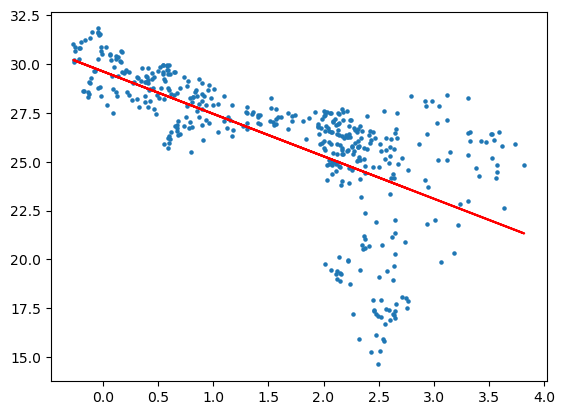

R-Squared: 0.4238180081000287
b0: 29.621153896952535
b1: -2.169850932485912


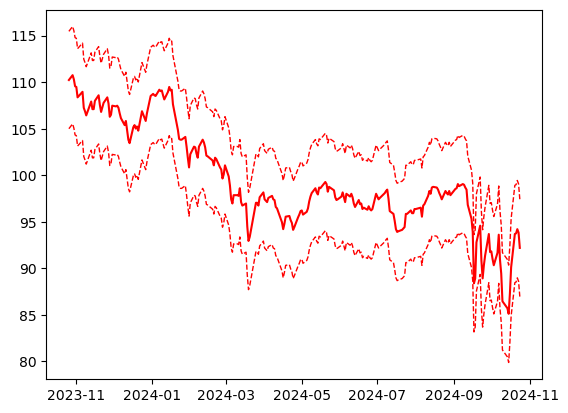

,Date,spread_10_3,Adj Close,Dividend Yield,Lower,Adj Fitted,Upper
1,2023-10-26,-1.13,NaN,6.968377,104.996373,110.230847,115.465322
2,2023-10-29,-1.20,NaN,6.968377,105.518397,110.752871,115.987346
3,2023-10-30,-1.14,NaN,6.968377,105.070948,110.305422,115.539897
4,2023-10-31,-1.04,NaN,6.968377,104.325199,109.559674,114.794148
5,2023-11-01,-1.03,NaN,6.968377,104.250625,109.485099,114.719573
...,...,...,...,...,...,...,...
242,2024-10-20,1.09,NaN,6.968377,88.440759,93.675234,98.909708
243,2024-10-21,1.08,NaN,6.968377,88.515334,93.749809,98.984283
244,2024-10-22,1.02,NaN,6.968377,88.962783,94.197258,99.431732
245,2024-10-23,1.07,NaN,7.550859,88.589909,93.824384,99.058858


In [75]:
SLR_test(test_2024_final, gfc_model, SLR(gfc)[1])

In [76]:
test_1 = test_2023.copy()
# test_1
test_2 = test_2024_final.copy().drop(columns=['Dividend Yield'])
test_2
tests = [test_1, test_2]
test_1_plus_2 = pd.concat(tests, ignore_index=True)

test_1_plus_2

,Date,spread_10_2,spread_10_3,Adj Close,Delta,Extremes
0,2023-05-04,-0.38,-1.89,127.948524,-1.410914,Non-Extreme
1,2023-05-05,-0.48,-1.82,129.740021,1.400170,Non-Extreme
2,2023-05-08,-0.48,-1.79,130.007263,0.205983,Non-Extreme
3,2023-05-09,-0.48,-1.76,128.106873,-1.461757,Non-Extreme
4,2023-05-10,-0.47,-1.81,127.641701,-0.363112,Non-Extreme
...,...,...,...,...,...,...
358,2024-10-20,2.20,1.09,NaN,7.740579,Positive Extreme
359,2024-10-21,2.18,1.08,NaN,-3.050400,Negative Extreme
360,2024-10-22,2.12,1.02,NaN,-3.436124,Negative Extreme
361,2024-10-23,2.09,1.07,NaN,2.903523,Positive Extreme


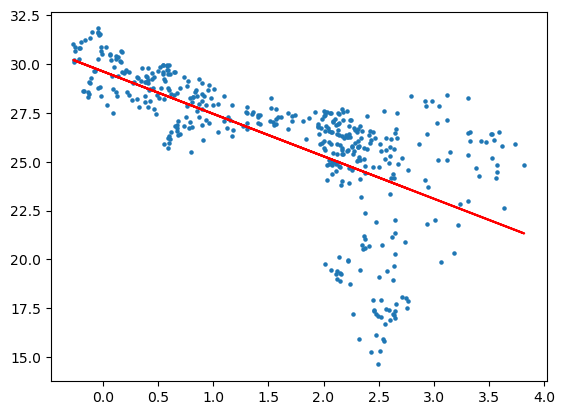

R-Squared: 0.4238180081000287
b0: 29.621153896952535
b1: -2.169850932485912


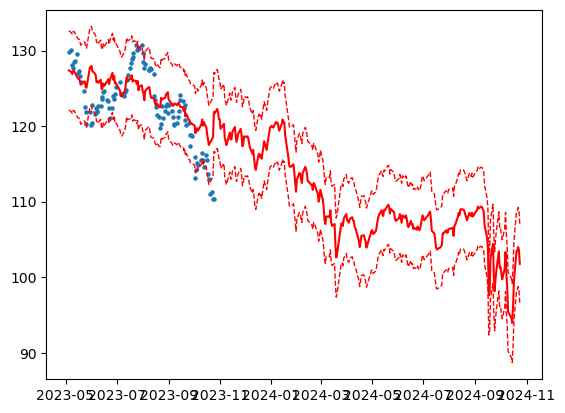

,Date,spread_10_3,Adj Close,Lower,Adj Fitted,Upper
1,2023-05-05,-1.82,129.740021,122.137751,127.372225,132.606700
2,2023-05-08,-1.79,130.007263,121.890766,127.125240,132.359714
3,2023-05-09,-1.76,128.106873,121.643780,126.878255,132.112729
4,2023-05-10,-1.81,127.641701,122.055422,127.289897,132.524371
5,2023-05-11,-1.81,128.512695,122.055422,127.289897,132.524371
...,...,...,...,...,...,...
358,2024-10-20,1.09,NaN,98.180188,103.414663,108.649137
359,2024-10-21,1.08,NaN,98.262517,103.496991,108.731466
360,2024-10-22,1.02,NaN,98.756487,103.990962,109.225436
361,2024-10-23,1.07,NaN,98.344845,103.579320,108.813794


In [77]:
SLR_test(test_1_plus_2, gfc_model, SLR(gfc)[1])

In [78]:
test_2023.to_csv('test_2023.csv')

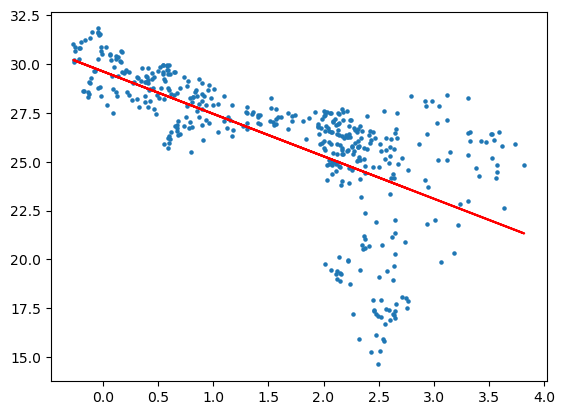

R-Squared: 0.4238180081000287
b0: 29.621153896952535
b1: -2.169850932485912


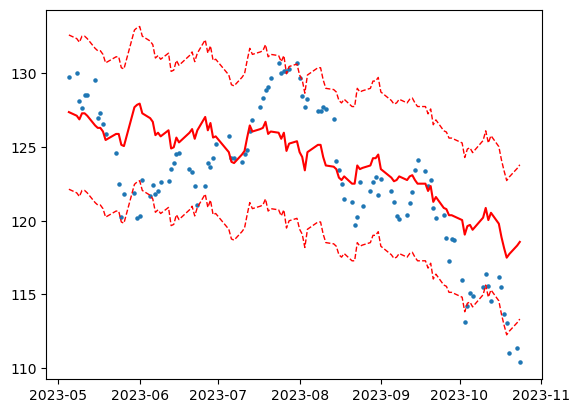

,Date,spread_10_3,Adj Close,Lower,Adj Fitted,Upper
1,2023-05-05,-1.82,129.740021,122.137751,127.372225,132.606700
2,2023-05-08,-1.79,130.007263,121.890766,127.125240,132.359714
3,2023-05-09,-1.76,128.106873,121.643780,126.878255,132.112729
4,2023-05-10,-1.81,127.641701,122.055422,127.289897,132.524371
5,2023-05-11,-1.81,128.512695,122.055422,127.289897,132.524371
...,...,...,...,...,...,...
111,2023-10-18,-0.70,113.650002,112.916971,118.151445,123.385920
112,2023-10-19,-0.62,113.029999,112.258344,117.492818,122.727292
113,2023-10-20,-0.65,111.010002,112.505329,117.739803,122.974278
114,2023-10-23,-0.72,111.330002,113.081628,118.316102,123.550576


In [79]:
SLR_test(test_2023, gfc_model, SLR(gfc)[1])

In [80]:
# SLR_test(test_2023, gfc_model).to_csv('gfc1_2023.csv')

In [81]:
# SLR_test(test_2023, gfc_dum).to_csv('gfc2_2023.csv')